In [1]:
import pandas as pd
import os
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
df = pd.read_csv(r'C:\Users\SV Reddy\Downloads\cancer_reg.csv',encoding="latin")

Let us first view the data we have.

In [2]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# Data cleaning
Before we proceed to the further steps of the model building first we need to make sure we have data where there are no missing values as missing values hinder the performance of our model.

1. find the total number of missing values in each column 
2. replace the missing values accordingly or delete the column if there are too many missing values

In [3]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

- We can see that the column "PctSomeCol18_24" has many missing values so it is not a good idea to impute the missing values with the values that are present as it would hinder the performance of our model drastically. So, the best option would be dropping the column.
- The columns "PctEmployed16_Over" and "PctPrivateCoverageAlone" also has some missing but this problem can be solved by imputing the values. I am choosing to impute the values by the mean of the values of the respective columns as I have gone through the data manually and the values are close to each other in it, there are no outliers so we can safely choose mean.

In [4]:
#dropping the column PctSomeCol18_24
del df['PctSomeCol18_24']

#imputing the columns PctEmployed16_Over and PctPrivateCoverageAlone
df['PctEmployed16_Over'] = df['PctEmployed16_Over'].fillna((df['PctEmployed16_Over'].mean()))
df['PctPrivateCoverageAlone'] = df['PctPrivateCoverageAlone'].fillna((df['PctPrivateCoverageAlone'].mean()))

Now let us again look at the data if there are any missing values in it

In [5]:
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

The next step is to make sure we have all interger or float values as objects cannot be used in the model building.

In [6]:
#checking the datatypes of all the columns in the dataframe
df.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

We can clearly see that the columns "binnedInc" and "Geography" contains objects and they cannot be used in the model building so dropping these columns would be the best option.

In [7]:
del df['binnedInc']
del df['Geography']

We can safely say that the data is now clean from the missing values, object type columns and we are good to work on bulding the model further.

# Feature Selection
There are 33 variables that can be used for estimating our target death ratea. We could start by checking out what a model using all variables would look like.



## We will use Ordinary Least Squares (OLS) from statsmodels library.

In [8]:
X = df[['avgAnnCount','avgDeathsPerYear', 'incidenceRate','medIncome','popEst2015','povertyPercent','studyPerCap','MedianAge','MedianAgeMale','MedianAgeFemale','AvgHouseholdSize','PercentMarried','PctNoHS18_24','PctHS18_24','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage','PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctBlack','PctAsian','PctOtherRace','PctMarriedHouseholds','BirthRate']]
y = df['TARGET_deathRate']

X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()

est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     110.4
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:37:03   Log-Likelihood:                -13320.
No. Observations:                3047   AIC:                         2.670e+04
Df Residuals:                    3016   BIC:                         2.689e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     164.3756     15.427     10.655      0.000     134.127     194.624
avgAnnCount                -0.0032      0.001     -4.213      0.000      -0.005      -0.002
avgDeathsPerYear            0.0180      0.004      4.639      0.000       0.010       0.026
incidenceRate               0.1925      0.007     26.728      0.000       0.178       0.207
medIncome                   0.0001   8.01e-05      1.374      0.170    -4.7e-05       0.000
popEst2015              -1.587e-05   5.45e-06     -2.909      0.004   -2.66e-05   -5.17e-06
povertyPercent              0.3663      0.161      2.279      0.023       0.051       0.681
studyPerCap              7.032e-05      0.001      0.104      0.917      -0.001       0.001
MedianAge                  -0.0024      0.008     -0.307      0.759      -0.018       0.013
MedianAgeMale              -0.4574      0.208     -2.204      0.028      -0.864      -0.051
MedianAgeFemale            -0.1355      0.216     -0.626      0.531      -0.560       0.289
AvgHouseholdSize            0.7394      0.956      0.774      0.439      -1.134       2.613
PercentMarried              1.2986      0.165      7.892      0.000       0.976       1.621
PctNoHS18_24               -0.1406      0.056     -2.520      0.012      -0.250      -0.031
PctHS18_24                  0.2139      0.049      4.346      0.000       0.117       0.310
PctBachDeg18_24            -0.0856      0.108     -0.794      0.427      -0.297       0.126
PctHS25_Over                0.4100      0.096      4.260      0.000       0.221       0.599
PctBachDeg25_Over          -1.1798      0.154     -7.681      0.000      -1.481      -0.879
PctEmployed16_Over         -0.5354      0.100     -5.377      0.000      -0.731      -0.340
PctUnemployed16_Over        0.1248      0.166      0.752      0.452      -0.201       0.450
PctPrivateCoverage         -0.5036      0.138     -3.648      0.000      -0.774      -0.233
PctPrivateCoverageAlone     0.0598      0.084      0.709      0.478      -0.106       0.225
PctEmpPrivCoverage          0.3513      0.104      3.368      0.001       0.147       0.556
PctPublicCoverage          -0.2641      0.228     -1.156      0.248      -0.712       0.184
PctPublicCoverageAlone      0.3464      0.281      1.232      0.218      -0.205       0.898
PctWhite                   -0.1355      0.057     -2.371      0.018      -0.247      -0.023
PctBlack                   -0.0534      0.055     -0.968      0.333      -0.162       0.055
PctAsian                   -0.0466      0.188     -0.248      0.804      -0.415       0.322
PctOtherRace               -0.8927      0.124     -7.221      0.000      -1.135      -0.650
PctMarriedHouseholds       -1.3025      0.158     -8.238      0.000      -1.612      -0.992
BirthRate                  -0.8745      0.192  

- R-squared is 0.52, which isn't too bad. However, with 33 variables this would be a far too complicated model. Let's see if we can start simplifying it by cutting the number of variables.

- With all the categorical values included, it should be safe to assume all data points are not normally distributed. Therefore, trying to choose the variables with the lowest standard errors does not really work. We will instead standardize the data first.

- With the variables normalized we can compare them and choose the ones with highest coefficient values for our model.

In [9]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df.loc[:,('avgAnnCount','avgDeathsPerYear', 'incidenceRate','medIncome','popEst2015','povertyPercent','studyPerCap','MedianAge','MedianAgeMale','MedianAgeFemale','AvgHouseholdSize','PercentMarried','PctNoHS18_24','PctHS18_24','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage','PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctBlack','PctAsian','PctOtherRace','PctMarriedHouseholds','BirthRate')]
y = df['TARGET_deathRate']

X[['avgAnnCount','avgDeathsPerYear', 'incidenceRate','medIncome','popEst2015','povertyPercent','studyPerCap','MedianAge','MedianAgeMale','MedianAgeFemale','AvgHouseholdSize','PercentMarried','PctNoHS18_24','PctHS18_24','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage','PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctBlack','PctAsian','PctOtherRace','PctMarriedHouseholds','BirthRate']] = scale.fit_transform(X[['avgAnnCount','avgDeathsPerYear', 'incidenceRate','medIncome','popEst2015','povertyPercent','studyPerCap','MedianAge','MedianAgeMale','MedianAgeFemale','AvgHouseholdSize','PercentMarried','PctNoHS18_24','PctHS18_24','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage','PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctBlack','PctAsian','PctOtherRace','PctMarriedHouseholds','BirthRate']].values)

est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       TARGET_deathRate   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              1.255
Date:                Fri, 21 Aug 2020   Prob (F-statistic):                       0.161
Time:                        20:37:03   Log-Likelihood:                         -20141.
No. Observations:                3047   AIC:                                  4.034e+04
Df Residuals:                    3017   BIC:                                  4.052e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
avgAnnCount                -4.5937     10.227     -0.449      0.653     -24.646      15.459
avgDeathsPerYear            9.0787     18.353      0.495      0.621     -26.906      45.064
incidenceRate              10.5020      3.685      2.850      0.004       3.276      17.728
medIncome                   1.3240      9.038      0.146      0.884     -16.398      19.046
popEst2015                 -5.2199     16.829     -0.310      0.756     -38.218      27.778
povertyPercent              2.3470      9.659      0.243      0.808     -16.592      21.286
studyPerCap                 0.0372      3.350      0.011      0.991      -6.532       6.607
MedianAge                  -0.1084      3.311     -0.033      0.974      -6.600       6.383
MedianAgeMale              -2.3898     10.169     -0.235      0.814     -22.328      17.548
MedianAgeFemale            -0.7172     10.738     -0.067      0.947     -21.771      20.337
AvgHouseholdSize            0.3173      3.846      0.083      0.934      -7.223       7.858
PercentMarried              8.9549     10.641      0.842      0.400     -11.910      29.820
PctNoHS18_24               -1.1381      4.236     -0.269      0.788      -9.444       7.168
PctHS18_24                  1.9395      4.186      0.463      0.643      -6.268      10.147
PctBachDeg18_24            -0.3877      4.581     -0.085      0.933      -9.370       8.594
PctHS25_Over                2.8836      6.348      0.454      0.650      -9.564      15.331
PctBachDeg25_Over          -6.3636      7.770     -0.819      0.413     -21.599       8.871
PctEmployed16_Over         -4.3384      7.568     -0.573      0.567     -19.177      10.500
PctUnemployed16_Over        0.4309      5.372      0.080      0.936     -10.102      10.964
PctPrivateCoverage         -5.3605     13.781     -0.389      0.697     -32.382      21.661
PctPrivateCoverageAlone     0.5393      7.134      0.076      0.940     -13.449      14.527
PctEmpPrivCoverage          3.3185      9.240      0.359      0.720     -14.799      21.436
PctPublicCoverage          -2.0703     16.796     -0.123      0.902     -35.004      30.863
PctPublicCoverageAlone      2.1172     16.116      0.131      0.895     -29.482      33.716
PctWhite                   -2.2183      8.773     -0.253      0.800     -19.421      14.984
PctBlack                   -0.7764      7.521     -0.103      0.918     -15.523      13.970
PctAsian                   -0.1216      4.600     -0.026      0.979      -9.142       8.899
PctOtherRace               -3.1396      4.078     -0.770      0.441     -11.135       4.856
PctMarriedHouseholds       -8.5594      9.744     -0.878      0.380     -27.665      10.547
BirthRate                  -1.7364      

We may disregard the low R-squared, since we are only looking at the sizes of the <b>normalized coefficients</b>. The 11 largest, in descending order, are (size of coefficient in brackets):
- <b> incidenceRate </b> (10.5020) = Mean per capita (100,000) cancer diagoses
- <b> avgDeathsPerYear </b> (9.0787) = Mean number of reported mortalities due to cancer
- <b> PercentMarried </b> (8.9549) = Percent of county residents who are married
- <b> PctMarriedHouseholds </b> (8.5594) = Percent of married households
- <b> PctBachDeg25_Over </b> (6.3636) = Percent of county residents ages 25 and over highest education attained:bachelor's degree
- <b> PctPrivateCoverage </b> (5.3605) = Percent of county residents with private health coverage 
- <b> popEst2015 </b> (5.2199) = Population of county 
- <b> avgAnnCount </b> (4.5937) = Mean number of reported cases of cancer diagnosed annually
- <b> PctEmployed16_Over </b> (4.3384) = Percent of county residents ages 16 and over employed
- <b> PctEmpPrivCoverage </b> (3.3185) = Percent of county residents with employee-provided private health coverage
- <b> PctOtherRace </b> (3.1396) = Percent of county residents who identify in a category which is not White, Black, or Asian

If we see these variables some of them seems to be very similar like PercentMarried, PctMarriedHouseholds and PctPrivateCoverage, PctEmpPrivCoverage seems to be very similar so let us see correlation between these variables with each other.

In [10]:
df_sqft = df[['PercentMarried', 'PctMarriedHouseholds']]
df_sqft.corr()

,PercentMarried,PctMarriedHouseholds
PercentMarried,1.000000,0.870261
PctMarriedHouseholds,0.870261,1.000000


In [11]:
df_sqft = df[['PctPrivateCoverage', 'PctEmpPrivCoverage']]
df_sqft.corr()

,PctPrivateCoverage,PctEmpPrivCoverage
PctPrivateCoverage,1.000000,0.827459
PctEmpPrivCoverage,0.827459,1.000000


 We are right there is high correlation between these variables. So, let us drop <b> PctMarriedHouseholds </b> and <b> PctEmpPrivCoverage </b> for proceeding towards further steps.

In [12]:
X = df[[ 'incidenceRate','avgDeathsPerYear','PercentMarried', 'PctBachDeg25_Over', 'PctPrivateCoverage','popEst2015','avgAnnCount','PctEmployed16_Over','PctOtherRace']]
y = df['TARGET_deathRate']

X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     322.0
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:37:03   Log-Likelihood:                -13428.
No. Observations:                3047   AIC:                         2.688e+04
Df Residuals:                    3037   BIC:                         2.694e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                160.8819      4.705     34.190      0.000     151.656     170.108
incidenceRate          0.2132      0.007     30.093      0.000       0.199       0.227
avgDeathsPerYear       0.0191      0.004      4.947      0.000       0.012       0.027
PercentMarried        -0.3492      0.064     -5.416      0.000      -0.476      -0.223
PctBachDeg25_Over     -1.6300      0.097    -16.767      0.000      -1.821      -1.439
PctPrivateCoverage    -0.5018      0.056     -8.971      0.000      -0.612      -0.392
popEst2015         -1.231e-05   5.38e-06     -2.287      0.022   -2.29e-05   -1.76e-06
avgAnnCount           -0.0043      0.001     -5.479      0.000      -0.006      -0.003
PctEmployed16_Over    -0.0644      0.067     -0.955      0.339      -0.196       0.068
PctOtherRace          -0.9955      0.112     -8.850      0.000      -1.216      -0.775
==============================================================================
Omnibus:                      193.501   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              828.136
Skew:                           0.117   Prob(JB):                    1.49e-180
Kurtosis:                       5.543   Cond. No.                     4.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- By using just 9 variables we have got r squared value to be 0.49 which is close to the original value and quite good as we have come down from 33 varaiables to just 9 variables.

The chose variables with their coefficient values are:

- <b> incidenceRate </b>           10.5020 
- <b> avgDeathsPerYear </b>        9.0787
- <b> PercentMarried </b>          8.9549
- <b> PctMarriedHouseholds </b>    8.5594
- <b> PctBachDeg25_Over </b>       6.3636
- <b> PctPrivateCoverage </b>      5.3605 
- <b> popEst2015 </b>              5.2199 
- <b> avgAnnCount </b>             4.5937 
- <b> PctEmployed16_Over </b>      4.3384
- <b> PctEmpPrivCoverage </b>      3.3185 
- <b> PctOtherRace </b>            3.1396

Now let us take a look at the correlation matrix and its heatmap.

In [13]:
df_sub = df[['TARGET_deathRate','incidenceRate','avgDeathsPerYear','PercentMarried', 'PctBachDeg25_Over', 'PctPrivateCoverage','popEst2015','avgAnnCount','PctEmployed16_Over','PctOtherRace']]
df_sub.corr()

,TARGET_deathRate,incidenceRate,avgDeathsPerYear,PercentMarried,PctBachDeg25_Over,PctPrivateCoverage,popEst2015,avgAnnCount,PctEmployed16_Over,PctOtherRace
TARGET_deathRate,1.000000,0.449432,-0.090715,-0.266820,-0.485477,-0.386066,-0.120073,-0.143532,-0.397487,-0.189894
incidenceRate,0.449432,1.000000,0.062690,-0.119524,-0.038177,0.105174,0.026912,0.073553,0.004622,-0.208748
avgDeathsPerYear,-0.090715,0.062690,1.000000,-0.181029,0.293210,0.056183,0.977634,0.939408,0.125015,0.215149
PercentMarried,-0.266820,-0.119524,-0.181029,1.000000,0.103585,0.449452,-0.160463,-0.106108,0.393808,-0.104669
PctBachDeg25_Over,-0.485477,-0.038177,0.293210,0.103585,1.000000,0.603248,0.297463,0.321021,0.597301,0.039075
PctPrivateCoverage,-0.386066,0.105174,0.056183,0.449452,0.603248,1.000000,0.052677,0.132244,0.681147,-0.176300
popEst2015,-0.120073,0.026912,0.977634,-0.160463,0.297463,0.052677,1.000000,0.926894,0.139571,0.241468
avgAnnCount,-0.143532,0.073553,0.939408,-0.106108,0.321021,0.132244,0.926894,1.000000,0.197981,0.209184
PctEmployed16_Over,-0.397487,0.004622,0.125015,0.393808,0.597301,0.681147,0.139571,0.197981,1.000000,0.048235
PctOtherRace,-0.189894,-0.208748,0.215149,-0.104669,0.039075,-0.176300,0.241468,0.209184,0.048235,1.000000


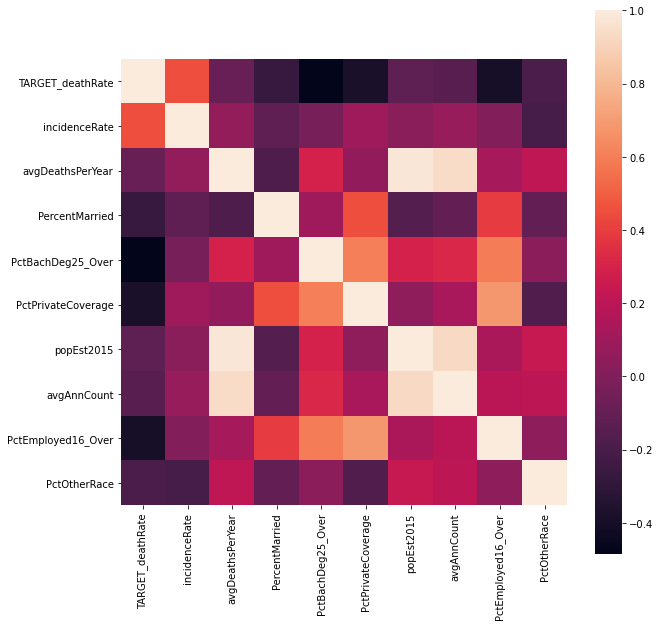

In [14]:
corrmat = df_sub.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

## Data distribution

In the beginning we have assumed all the variable to not be normally distributed. Let us see if our assumption is still true.

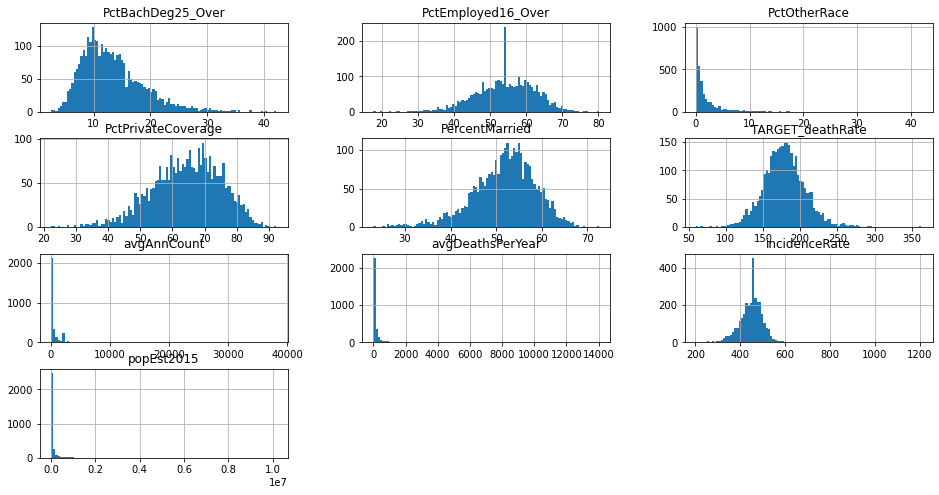

In [15]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0]=16.0
fig_size[1]=8.0
df_sub.hist(bins=100)
plt.show()

We can see only half of our variables follow <b> normal distribution </b>. So, our assumption is right and we can proceed further.

# Model Building


## Model 1


- Let us first split the given data set into training and testing set. ( I will choose the standard 80:20 split)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 465)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 2437
Testing Data Count: 610


- Let us now train the data 

In [17]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     262.2
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:37:08   Log-Likelihood:                -10724.
No. Observations:                2437   AIC:                         2.147e+04
Df Residuals:                    2427   BIC:                         2.153e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                155.5829      5.242     29.679      0.000     145.303     165.863
incidenceRate          0.2238      0.008     28.200      0.000       0.208       0.239
avgDeathsPerYear       0.0193      0.004      4.483      0.000       0.011       0.028
PercentMarried        -0.4142      0.071     -5.812      0.000      -0.554      -0.274
PctBachDeg25_Over     -1.6766      0.107    -15.624      0.000      -1.887      -1.466
PctPrivateCoverage    -0.4347      0.061     -7.099      0.000      -0.555      -0.315
popEst2015         -1.225e-05   5.92e-06     -2.070      0.039   -2.39e-05   -6.43e-07
avgAnnCount           -0.0045      0.001     -5.301      0.000      -0.006      -0.003
PctEmployed16_Over    -0.0699      0.074     -0.939      0.348      -0.216       0.076
PctOtherRace          -0.7876      0.123     -6.404      0.000      -1.029      -0.546
==============================================================================
Omnibus:                      170.342   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.321
Skew:                           0.208   Prob(JB):                    8.46e-153
Kurtosis:                       5.593   Cond. No.                     4.73e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- We have got <b> R squared value </b> close to 5 which is pretty good and close to the inital value using all the features.

Let us now plot the data

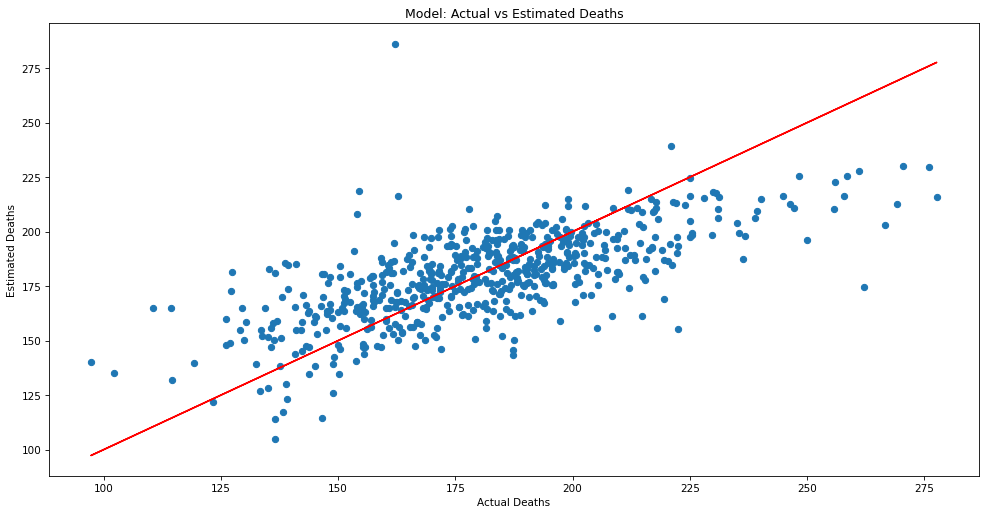

In [18]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Deaths")
plt.ylabel("Estimated Deaths")
plt.title("Model: Actual vs Estimated Deaths")
plt.show()

- The model is quite decent and fits the data well.

Let us now calculate the error terms.

In [19]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Squared Error (MSE) : {}".format(mse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE) :{}".format(rmse(y_test, y_preds))) 
print("Mean Absolute Perc. Error (MAPE) :{}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE): 15.535506687128336
Mean Squared Error (MSE) : 418.91074589001767
Root Mean Squared Error (RMSE) :20.467309200039406
Mean Absolute Perc. Error (MAPE) :8.794881340735214


- Let us now plot the error plot to see if it follows normal distribution

Text(0.5, 0, 'Errors')

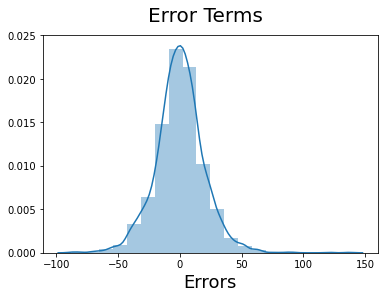

In [20]:
y_train_ = results.predict(X_train)
%matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                         

- We can see that Normal distribution is followed and hence our model is a good fit to the data.

## Model 2

- In the previous model we have a feature with <b> p-value </b> greater than 0.05. So, let us eliminate that feature, split the dataset and see if our model becomes any different


In [21]:
#We have eliminated the feature "PctEmployed16_Over" as it has p-value more than 0.05
X1 = df[[ 'incidenceRate','avgDeathsPerYear','PercentMarried', 'PctBachDeg25_Over', 'PctPrivateCoverage','popEst2015','avgAnnCount','PctOtherRace']]
y = df['TARGET_deathRate']

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state = 465)

print('Training Data Count: {}'.format(X1_train.shape[0]))
print('Testing Data Count: {}'.format(X1_test.shape[0]))

Training Data Count: 2437
Testing Data Count: 610


- Now let us train this model 

In [22]:
X1_train = sm.add_constant(X1_train)
results = sm.OLS(y1_train, X1_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     294.9
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:37:09   Log-Likelihood:                -10725.
No. Observations:                2437   AIC:                         2.147e+04
Df Residuals:                    2428   BIC:                         2.152e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                154.5761      5.131     30.124      0.000     144.514     164.638
incidenceRate          0.2236      0.008     28.185      0.000       0.208       0.239
avgDeathsPerYear       0.0196      0.004      4.578      0.000       0.011       0.028
PercentMarried        -0.4293      0.069     -6.183      0.000      -0.565      -0.293
PctBachDeg25_Over     -1.7089      0.102    -16.807      0.000      -1.908      -1.510
PctPrivateCoverage    -0.4568      0.057     -8.085      0.000      -0.568      -0.346
popEst2015         -1.257e-05   5.91e-06     -2.126      0.034   -2.42e-05   -9.75e-07
avgAnnCount           -0.0046      0.001     -5.387      0.000      -0.006      -0.003
PctOtherRace          -0.8079      0.121     -6.674      0.000      -1.045      -0.571
==============================================================================
Omnibus:                      169.233   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.594
Skew:                           0.204   Prob(JB):                    8.99e-152
Kurtosis:                       5.585   Cond. No.                     4.63e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- We can see that there is no change in the <b> r squared value </b> in spite of deleting one feature. 
- Let us now plot this model and see if we can find any difference.

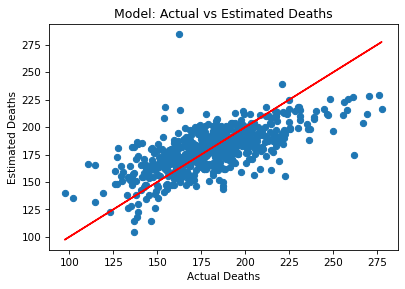

In [23]:
X1_test = sm.add_constant(X1_test)

y1_preds = results.predict(X1_test)

plt.figure(dpi = 75)
plt.scatter(y1_test, y1_preds)
plt.plot(y1_test, y1_test, color="red")
plt.xlabel("Actual Deaths")
plt.ylabel("Estimated Deaths")
plt.title("Model: Actual vs Estimated Deaths")
plt.show()

- We can't see much difference between the plotting of model 1 and model 2.
- Let us now head over to calculating the error terms and plotting the error plot

In [24]:
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y1_test, y1_preds)))
print("Mean Squared Error (MSE) : {}".format(mse(y1_test, y1_preds)))
print("Root Mean Squared Error (RMSE) :{}".format(rmse(y1_test, y1_preds))) 
print("Mean Absolute Perc. Error (MAPE) :{}".format(np.mean(np.abs((y1_test - y1_preds) / y1_test)) * 100))

Mean Absolute Error (MAE): 15.538332703096836
Mean Squared Error (MSE) : 418.95206399567877
Root Mean Squared Error (RMSE) :20.468318543438755
Mean Absolute Perc. Error (MAPE) :8.7938457219307


Text(0.5, 0, 'Errors')

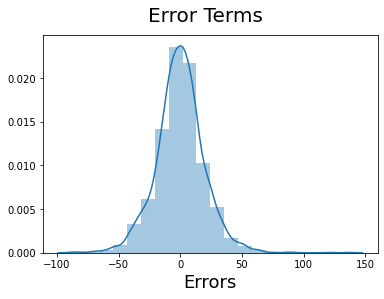

In [25]:
y1_train_ = results.predict(X1_train)
%matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y1_train - y1_train_), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

- We can see that there is no difference even in the error terms in spite of deleting a feature.

Therefore by seeing the above inferences we can safely say that there is no difference in deleting the feature PctEmployed16_Over

## Model Selection 

Between Model 1 and Model 2 selecting Model 2 would prove to be better as it has one less feature than the model 1 while having the same performance as model 1. Therefore complexity is a reduced a little while performance is kept same.

# Conclsion

- Overall we have built a good model for a large dataset with decent R squared value.
- Our model has a little more Mean absolute error than many people may encounter which is fine considering the missing values in the data set and number of features selected
- This model can be slightly improved by increasing the number of features but at the cost of making the model more complex.
- Model may be improved a little by using advanced methods like Using Multivariate Imputation by Chained Equation (MICE) or KNN to impute the missing data. 